In [132]:
import pandas as pd
import os
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE

In [33]:
data = pd.read_csv('out.csv')

#### 1. Descriptive analysis

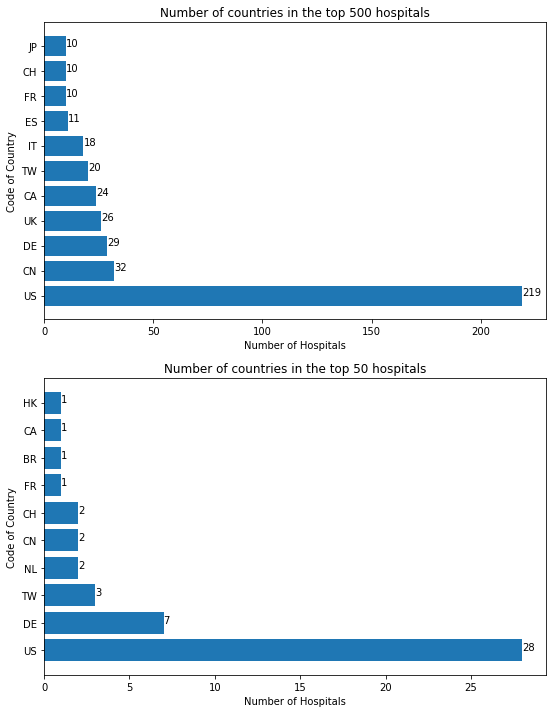

In [145]:
fig = plt.figure(figsize=(9,12))

#Describe the country where the top 50 hospitals are located
data_500 = data[0:500].copy()
data_500_list = data_500.Country.tolist()
counter = collections.Counter(data_500_list)
counter = dict(counter)
counter = sorted(counter.items(),key=lambda x: x[1], reverse=True)
top10_country = [item[0].upper() for item in counter[0:11]]
top10_num = [item[1] for item in counter[0:11]]

plt.subplot(2,1,1)
plt.barh(range(len(top10_num)), top10_num, tick_label = top10_country)
plt.xlabel("Number of Hospitals")
plt.ylabel("Code of Country")
plt.title("Number of countries in the top 500 hospitals")
X = range(len(top10_num))
for a,b in zip(X, top10_num):
    plt.text(b,a,'%d'%b)
    
# Describe the country where the top 50 hospitals are located
data_50 = data[0:50].copy()
data_50_list = data_50.Country.tolist()
counter = collections.Counter(data_50_list)
counter = dict(counter)
counter = sorted(counter.items(),key=lambda x: x[1], reverse=True)
max_len = 10 if len(counter)>10 else len(counter)
top10_country = [item[0].upper() for item in counter[0:max_len]]
top10_num = [item[1] for item in counter[0:max_len]]

plt.subplot(2,1,2)
plt.barh(range(len(top10_num)), top10_num, tick_label = top10_country)
plt.xlabel("Number of Hospitals")
plt.ylabel("Code of Country")
plt.title("Number of countries in the top 50 hospitals")
X = range(len(top10_num))
for a,b in zip(X, top10_num):
    plt.text(b,a,'%d'%b)
plt.show()

- Note: In fact, the first picture has a total of 11 countries, because the ranking of the last three countries (JP, CH, FR) is tied.
- As can be seen from the first chart above, the United States (US) has the largest number of the top 500 hospitals, occupying 219 seats; while the second-ranked China has only 32 willing to be selected, which is in line with the first-ranked US The gap is very clear.
- As can be seen from the second chart above, the number of the top 50 hospitals in the United States (US) is still the largest, with 28 hospitals selected, while the second place Germany (DE) has 7 hospitals selected, only the first Named 1/4 of the United States.

#### 2.Correlation analysis

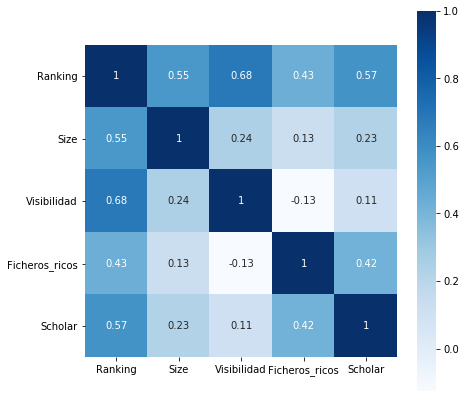

In [146]:
data_corr = data[['Ranking','Size','Visibilidad','Ficheros_ricos','Scholar']]
corr_val = data_corr.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_val,annot=True,square=True,cmap='Blues')
plt.show()

- Focus on the relevance of ranking to other factors first. It can be seen that the correlation between Visbilidad and Ranking is the highest, reaching 0.68, followed by the Scholar factor, with a correlation coefficient of 0.57, and the third is the Size factor, with a correlation coefficient of 0.55. The correlation of these three factors with Ranking exceeds 0.5, the degree of fitting is relatively high, while the value of the Ficheros Ricos factor is only 0.43.
- Now we pay attention to the other four factors except Rank. The correlation between any two other factors is lower than 0.5, and the value is basically below 0.25. It can be seen that these four factors are independent and linearly uncorrelated.

#### 3.Linear regression

['0.15', '0.46', '0.17', '0.54']


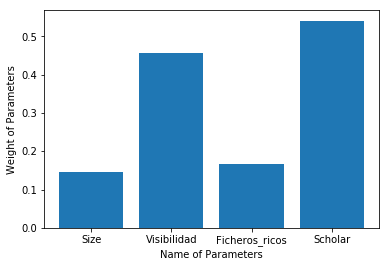

In [147]:
Xy_data= data[['Ranking','Size','Visibilidad','Ficheros_ricos','Scholar']].copy()
X = Xy_data[['Size','Visibilidad','Ficheros_ricos','Scholar']].values
y = Xy_data['Ranking'].values
model = LinearRegression(normalize=True)
# print(model.coef_)
model.fit(X,y)
coef_val = model.coef_
print(["%.2f"%item for item in coef_val])
coef_name = ['Size','Visibilidad','Ficheros_ricos','Scholar']
plt.bar(range(len(coef_name)),coef_val,tick_label = coef_name)
plt.xlabel('Name of Parameters')
plt.ylabel('Weight of Parameters')
plt.show()

- According to the weights learned from the linear model, it is known that the Scholar factor has the highest proportion, with a weight of 0.54, the second is the Visibilidad factor, with a weight of 0.46, and the lowest is the Size factor, which is only 0.15.

#### 4.Kmeans cluster analysis

In [148]:
data_clusters = data[['Size','Visibilidad','Ficheros_ricos','Scholar']].copy()
data_cls_norm = (data_clusters - data_clusters.min()) / (data_clusters.max() - data_clusters.min())


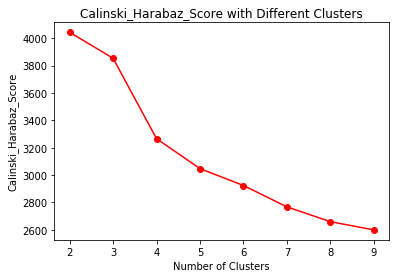

In [149]:
#clustering scores evaluated using the Calinski-Harabasz Index: The higher the score, the better the effect of clustering
data_cls_np = np.array(data_cls_norm)
k_list = [i for i in range(2,10)]
score_list = []
for i in k_list:
    model = KMeans(n_clusters=i,max_iter=1000,random_state=66)
    y_pre = model.fit_predict(data_cls_np)
    score_list.append(metrics.calinski_harabaz_score(data_cls_np,y_pre))

plt.plot(k_list,score_list,'ro-')
plt.title("Calinski_Harabaz_Score with Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski_Harabaz_Score")
plt.show()

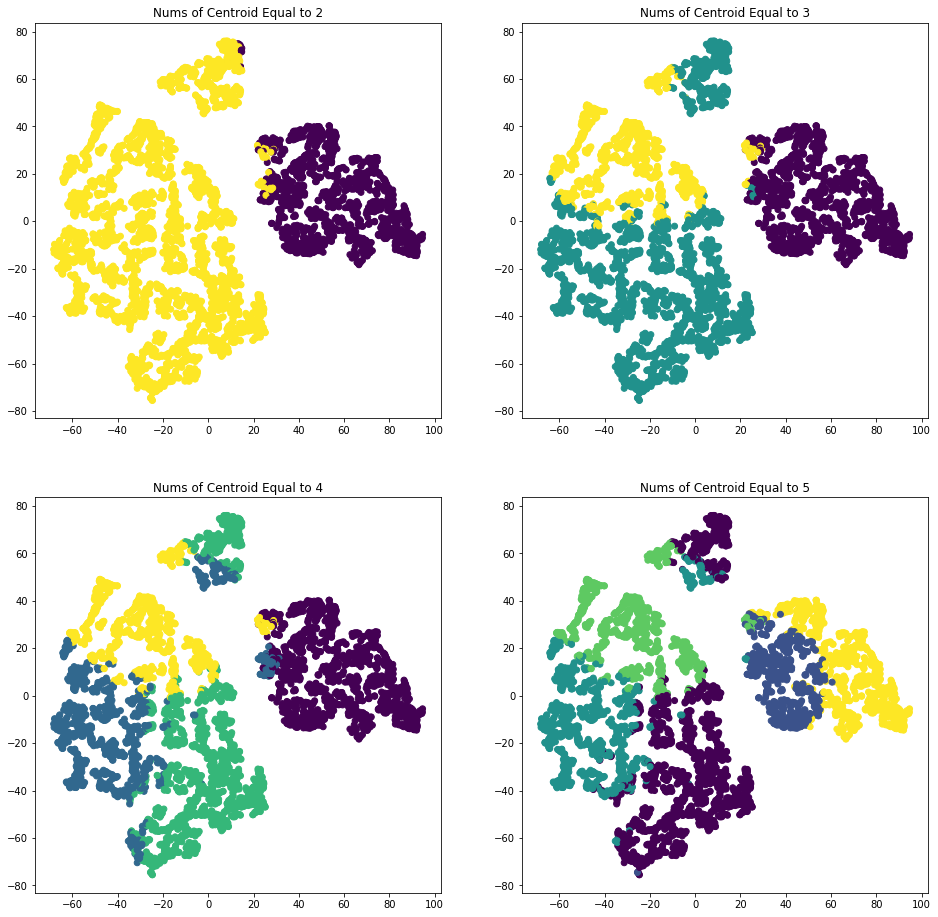

In [150]:
#Draw a clustering graph when k is different values
fig = plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
model = KMeans(n_clusters=2, max_iter=3000, random_state=66)
y_pre = model.fit_predict(data_cls_np)
tsne_data = TSNE(n_components = 2, init='pca',random_state=50).fit_transform(data_cls_np)
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = y_pre)
plt.title("Nums of Centroid Equal to 2")

plt.subplot(2,2,2)
model = KMeans(n_clusters=3, max_iter=3000, random_state=66)
y_pre = model.fit_predict(data_cls_np)
tsne_data = TSNE(n_components = 2, init='pca',random_state=50).fit_transform(data_cls_np)
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = y_pre)
plt.title("Nums of Centroid Equal to 3")

plt.subplot(2,2,3)
model = KMeans(n_clusters=4, max_iter=3000, random_state=66)
y_pre = model.fit_predict(data_cls_np)
tsne_data = TSNE(n_components = 2, init='pca',random_state=50).fit_transform(data_cls_np)
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = y_pre)
plt.title("Nums of Centroid Equal to 4")

plt.subplot(2,2,4)
model = KMeans(n_clusters=5, max_iter=3000, random_state=66)
y_pre = model.fit_predict(data_cls_np)
tsne_data = TSNE(n_components = 2, init='pca',random_state=50).fit_transform(data_cls_np)
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = y_pre)
plt.title("Nums of Centroid Equal to 5")

plt.show()

- Calinski_Harabaz_Score metrics is defined as ratio between the within-cluster dispersion and the between-cluster dispersion. The higher the value, the better the clustering effect. The score indicate that the clustering effect is best when k is equal to 2. 
- At the same time, I used the T-SNE method to reduce the dimension of the data, and took a different number of clusters k to draw the clustering effect. The above clustering chart shows that when k = 2, the different categories are more clearly distinguished because k = 2 is more appropriate.